In [1]:
from sympy import *
init_printing()
t,x0,x1,x2,C=symbols('t,x0,x1,x2,C',real=true)

In [2]:
# defino la función F
def F(x):
    F=(x[1],-x[0]*C)
    return F

F((x1,x2))



<h1>  Ejercicio resorte  <h1>

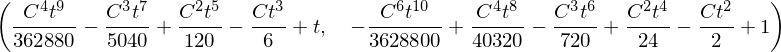

In [3]:
#calculo la phi_n por el método de Picard
x0=(0,1)
a=(0,C)
for j in range(10):
    a=((x0[0]+integrate(F(a)[0],t),x0[1]+integrate(F(a)[1],t)))

a


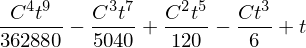

In [4]:
#calculo el polinomio de Taylor de la solución
serietaylor=0
f=1/sqrt(C)*sin(sqrt(C)*t)
b=f.subs(t,0)
j=0
for j in range(10):
    serietaylor=serietaylor+b/(factorial(j))*t**j
    f=f.diff(t)
    b=f.subs(t,0)
    j=j+1
serietaylor


<h1>  Ejercicio $X'=AX$   <h4>

In [5]:
#defino G
def G(x):
    G=(x[1],-x[0]-2*x[1])
    return G

G((x1,x2))

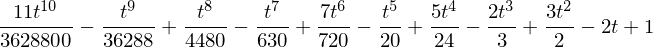

In [6]:
x0=(0,1)
a=x0
for j in range(10):
    a=((x0[0]+integrate(G(a)[0],t),x0[1]+integrate(G(a)[1],t)))

a[1].simplify()

<h1>  Pasar de sistema de ecuaciones a ecuación sola <h1>

In [7]:
X=Function('X',positive=true)(t)
Y=Function('Y',positive=true)(t)
Z=Function('Z',positive=true)(t)

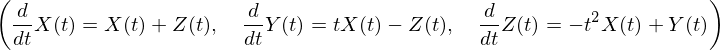

In [8]:
ec1=Eq(X.diff(t),X+Z)
ec2=Eq(Y.diff(t),t*X-Z)
ec3=Eq(Z.diff(t),-t**2*X+Y)
ec1, ec2, ec3

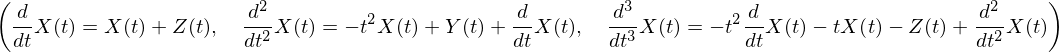

In [9]:
ec4=Eq(ec1.lhs.diff(t),ec1.rhs.diff(t).subs(Y.diff(t),ec2.rhs).subs(Z.diff(t),ec3.rhs))
ec5=Eq(ec4.lhs.diff(t),ec4.rhs.diff(t).subs(Y.diff(t),ec2.rhs).subs(Z.diff(t),ec3.rhs))
ec1, ec4, ec5


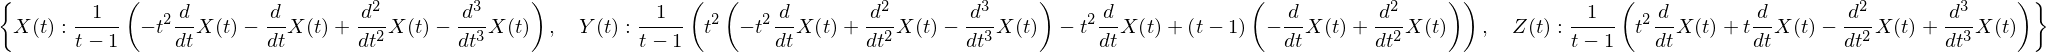

In [10]:
solve([ec1,ec4,ec5], [X,Y,Z])

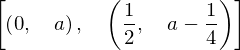

In [11]:
a,x,y=symbols('a,x,y')
solve([Eq(x**2+y,a), Eq(x+2*y,2*a)],[x,y])

<h1> Ejercicio de iteracion de Picard, $\varphi'(x)=\varphi(x)^2$  <h1>

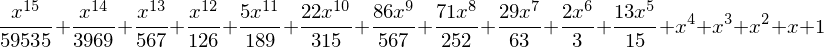

In [110]:
f=Function('f')(x)
f=1+0*x
p=1
n=4

for i in range(n):
    f=f.subs(x,t)
    f=1+integrate(f**2,(t,0,x))
    p=p+x**(i+1)
f.expand()